<a href="https://colab.research.google.com/github/sbbwoy/ESAA/blob/main/220530_part3_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Part 3. 케라스Keras

##1 딥러닝 준비

### 1.1 주요 용어

- 하이퍼파라미터hyper-parameter: 모델 훈련 시 사용자가 직접 설정해야 하는 값, 값을 조정하는 행위를 하이퍼파라미터 튜닝이라고 함

- 과소적합: 모델이 충분히 학습되지 않아 예측 성능이 떨어지는 경우
- 과대적합: 모델이 지나치게 학습되어 학습 데이터에 대한 예측 성능은 좋지만 실제 데이터에 대한 예측 오차가 떨어지는 경우

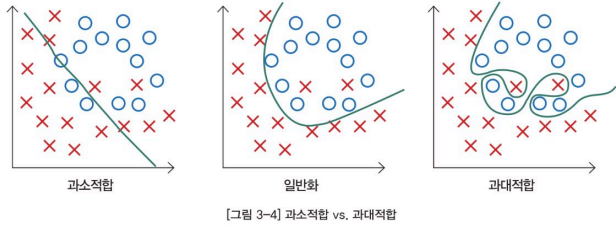

- 에포크epoch: 데이터 셋을 전부 학습하는 1회의 훈련 루프를 1회의 epoch라고 함

- 손실함수loss function: 예측 값과 정답 값의 오차
    - 지도 학습supervised learning
        - 이진 분류binary classification
            - 손실함수: binary crossentropy
            - 출력층 활성화 함수: sigmoid
        - 다중 분류multi-class calssification
            - 손실함수: categorical_crossentropy, sparse_categorical_crossentropy
            - 출력층 활성화 함수: softmax

    - 회귀regression
        - 손실함수: mean_squared_error, mean_absolute_error, huber

- 경사하강법gradient descent
    - 모델 훈련 시, 가중치weight에 대한 미분 값을 구하고 목적 함수 값이 낮아지는 방향으로 차감하면서 최소값을 찾는 방법

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def make_linear(w=0.5, b=0.8, size=50, noise=1.0):
    x = np.random.rand(size)
    y = w*x+b
    noise = np.random.uniform(-abs(noise), abs(noise), size=y.shape)
    yy = y+noise
    plt.figure(figsize=(10, 7))
    plt.plot(x, y, color = 'r', label = f'y = {w} * x + {b}')
    plt.scatter(x, yy, label='data')
    plt.legend(fontsize=20)
    plt.show()
    print(f'w: {w}, b: {b}')
    return x, yy

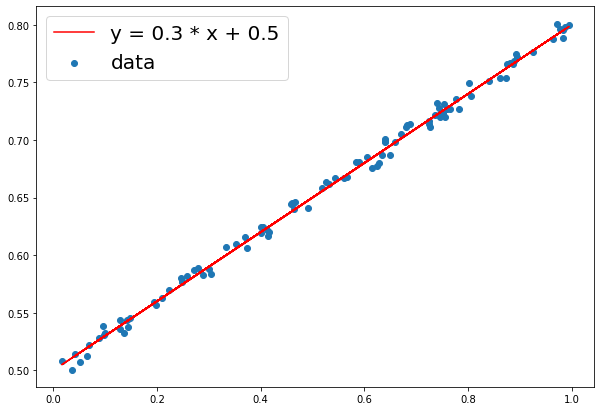

w: 0.3, b: 0.5


In [2]:
x, y = make_linear(w=0.3, b=0.5, size=100, noise=0.01)

In [3]:
#최대 반복 횟수
num_epoch = 1000

#학습률learning_rate
learning_rate = 0.005

#에러 기록
errors = []

#random한 값으로 w, b를 초기화 
w = np.random.uniform(low=0.0, high=1.0)
b = np.random.uniform(low=0.0, high=1.0)

for epoch in range(num_epoch):
    #hypothesis 정의
    y_hat = w*x+b

    #loss function
    error = 0.5*((y_hat-y)**2).sum()
    if error < 0.005:
        break

    #gradient 미분
    w = w - learning_rate*((y_hat-y)*x).sum()
    b = b - learning_rate * (y_hat - y).sum()

    errors.append(error)

    if epoch % 5 ==0:
        print('{0:2} w = {1:.5f}, b = {2:.5f} error = {3:.5f}'.format(epoch, w, b, error))

print('----' * 15)
print('{0:2} w = {1:.1f}, b = {2:.1f} error = {3:.5f}'.format(epoch, w, b, error))

 0 w = 0.23330, b = 0.66363 error = 6.37266
 5 w = 0.19761, b = 0.55906 error = 0.04833
10 w = 0.21245, b = 0.55002 error = 0.03546
15 w = 0.22537, b = 0.54272 error = 0.02621
20 w = 0.23640, b = 0.53649 error = 0.01946
25 w = 0.24581, b = 0.53117 error = 0.01455
30 w = 0.25385, b = 0.52663 error = 0.01096
35 w = 0.26072, b = 0.52275 error = 0.00835
40 w = 0.26658, b = 0.51944 error = 0.00645
45 w = 0.27158, b = 0.51662 error = 0.00506
------------------------------------------------------------
46 w = 0.3, b = 0.5 error = 0.00483


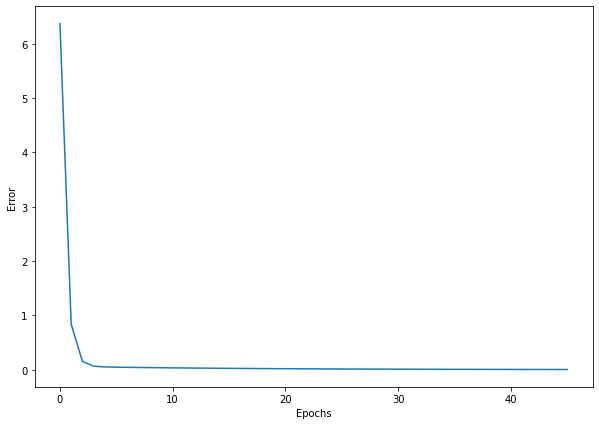

In [4]:
plt.figure(figsize=(10, 7))
plt.plot(errors)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

###1.2 딥러닝 프로세스

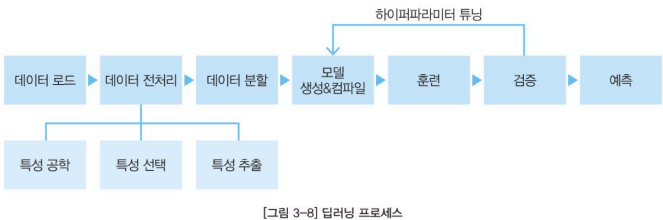

- 데이터 전처리: 데이터를 가공하는 단계
- 모델 생성: 모델의 구조를 정의, 생성하는 단계
    - 순차적 구조 모델: Sequential API
    - 다중 입력 및 출력: Functional API, Model Subclassing
- 모델 컴파일: 손실함수loss function, 옵티마이저optimizer, 평가지표metrics 등 여러 속성 값을 정의
- 모델 훈련: 모델 훈련하는 단계. fit() 함수에 학습 데이터 셋, 검증 데이터 셋, epoch, 배치batch 크기, 콜백callback 함수 등을 지정
- 모델 검증: 훈련 시 사용하지 않은 검증 데이터 셋을 입력하고 모델의 예측 값과 정답을 비교해 평가지표를 계산
- 모델 예측: 춘련과 검증이 완료된 모델로 테스트 셋에 대해 모델이 예측하고 결과를 반환

## 2. 단순 신경망 훈련

### 2.1 선형회귀 
- y = wx + b, w는 가중치, b는 편향

###2.2 뉴런(노드)
- 인공 신경망 모델을 구성하는 하나의 신경
- 신경망은 여러 개의 레이어를 가지며, 1개의 레이어는 1개 이상의 뉴런으로 구성

    - 역전파back propagation: 신경망 모델 파라미터에 대한 가중치를 계산하는 방법. 신경망을 구성하는 각 레이어와 관련된 손실함수를 미분한 결과인 가중치를 출력층에서 입력층 순으로 계산하고 저장

###2.3 Dense 레이어
- 심층 신경망 모델을 구성하는 가장 기본 레이어, 완전 연결층fully connected layer이라고 불림.

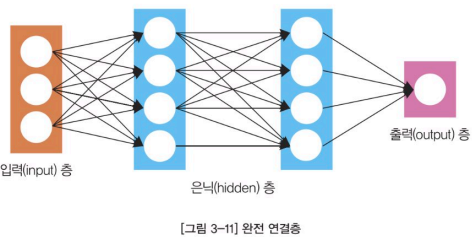

###2.4 데이터셋 만들기

In [5]:
x = np.arange(1, 6)
y = 3*x+2
print(x)
print(y)

[1 2 3 4 5]
[ 5  8 11 14 17]


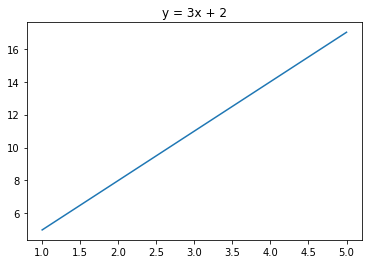

In [6]:
plt.plot(x, y)
plt.title('y = 3x + 2')
plt.show()

###2.5 Sequential API
- 시퀀스에 맞게 일렬로 연결하는 방식.

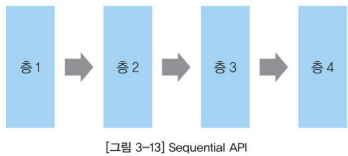

**모델 구조**

In [9]:
import tensorflow as tf
#리스트 형
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(10),
                             tf.keras.layers.Dense(5), 
                             tf.keras.layers.Dense(1),     
])

In [10]:
#add 함수로 레이어 추가
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Dense(5))
model.add(tf.keras.layers.Dense(1))

In [12]:
#입력 데이터 형태
## 첫 번째 층은 input_shape 매개변수 지정

model = tf.keras.Sequential([
                             #입력 데이터의 shape = (150, 4)인 경우 input_shape 지정, (4, )도 가능
                             tf.keras.layers.Dense(10, input_shape = [4]),
                             tf.keras.layers.Dense(5),
                             tf.keras.layers.Dense(1),
])

In [13]:
#단순선형회귀 모델 
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1, input_shape=[1])
])

In [14]:
#모델 요약
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


- Total params: 모델 내부에 존재하는 모든 파라미터의 합계
- Trainable params: 모델 훈련 시 업데이트할 파라미터의 총 개수
- Non-trainable params: 모델 훈련 시 업데이트하지 않을 파라미터의 총 개수 

**컴파일**

In [16]:
#클래스 인스턴스 지정
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.005), 
              loss=tf.keras.losses.MeanAbsoluteError(), 
              metrics=[tf.keras.metrics.MeanAbsoluteError(), 
                       tf.keras.metrics.MeanSquaredError()
                       ])

In [17]:
#함수 지정
model.compile(optimizer='sgd', loss='mean_squared_error', 
              metrics=['mean_squared_error', 'mean_absolute_error'])

In [18]:
# 짧은 문자열 지정
model.compile(optimizer='sgd', loss='mse', metrics=['mse', 'mae'])

In [19]:
# 단순선형회귀 모델 훈련을 위한 컴파일
model.compile(optimizer='sgd', loss='mse', metrics='mae')

**훈련**

In [20]:
history = model.fit(x, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 477ms/step - loss: 189.6819 - mae: 12.7974
Epoch 2/5
1/1 [==============================] - 0s 7ms/step - loss: 110.6021 - mae: 9.8060
Epoch 3/5
1/1 [==============================] - 0s 6ms/step - loss: 64.5178 - mae: 7.5224
Epoch 4/5
1/1 [==============================] - 0s 6ms/step - loss: 37.6618 - mae: 5.7789
Epoch 5/5
1/1 [==============================] - 0s 6ms/step - loss: 22.0110 - mae: 4.4479


* 반복 훈련 횟수가 충분하지 않아 과소적합

In [21]:
# 단순선형회귀 모델 생성
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])                    
])

# 컴파일
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

# 훈련
history = model.fit(x, y, epochs=1200)

Epoch 1/1200
1/1 [==============================] - 0s 277ms/step - loss: 74.4399 - mae: 8.1296
Epoch 2/1200
1/1 [==============================] - 0s 6ms/step - loss: 43.5124 - mae: 6.2585
Epoch 3/1200
1/1 [==============================] - 0s 5ms/step - loss: 25.4885 - mae: 4.8300
Epoch 4/1200
1/1 [==============================] - 0s 5ms/step - loss: 14.9842 - mae: 3.7393
Epoch 5/1200
1/1 [==============================] - 0s 5ms/step - loss: 8.8619 - mae: 2.9065
Epoch 6/1200
1/1 [==============================] - 0s 5ms/step - loss: 5.2933 - mae: 2.2705
Epoch 7/1200
1/1 [==============================] - 0s 5ms/step - loss: 3.2128 - mae: 1.7849
Epoch 8/1200
1/1 [==============================] - 0s 6ms/step - loss: 1.9995 - mae: 1.4140
Epoch 9/1200
1/1 [==============================] - 0s 5ms/step - loss: 1.2916 - mae: 1.1307
Epoch 10/1200
1/1 [==============================] - 0s 5ms/step - loss: 0.8783 - mae: 0.9143
Epoch 11/1200
1/1 [==============================] - 0s 5ms/ste

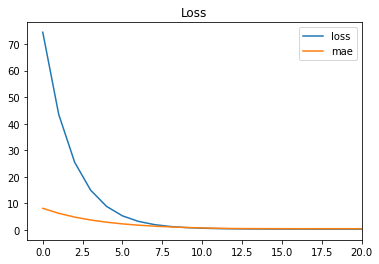

In [22]:
import matplotlib.pyplot as plt

# 20 에포크까지 Loss 수렴에 대한 시각화
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['mae'], label='mae')
plt.xlim(-1, 20)
plt.title('Loss')
plt.legend()
plt.show()

* 첫 10 epoch까지 손실이 급격히 감소함

**검증**

In [23]:
model.evaluate(x, y)

1/1 [==============================] - 0s 235ms/step - loss: 9.5297e-05 - mae: 0.0084


[9.529748058412224e-05, 0.008379077538847923]

**예측**

In [24]:
model.predict([10]) #predict(x인자)

array([[32.040497]], dtype=float32)

* x=10일 때, y=3x+2, y=32 감안하면 정답에 꽤 근사

###3.3 심층 신경망으로 이미지 분류

**tensorflow.keras.datasets 서브패키지 지원 샘플 데이터셋**

- boston_housing : 보스톤 주택 가격 데이터셋(회귀)
- cifar10 : CIFAR10 이미지 분류 데이터셋(분류)
- cifar100 : CIFAR100 이미지 분류 데이터셋(분류)
- mnist : mnist 손글씨 데이터셋(분류)
- fashion_mnist : 의류 데이터셋(분류)
- imdb : IMDb 영화 데이터셋(분류)
- reuters : Reuters 뉴스 토픽(분류

In [25]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

In [26]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [27]:
print('train set: ', x_train.shape, y_train.shape)
print('test  set: ', x_test.shape, y_test.shape)

train set:  (60000, 28, 28) (60000,)
test  set:  (10000, 28, 28) (10000,)


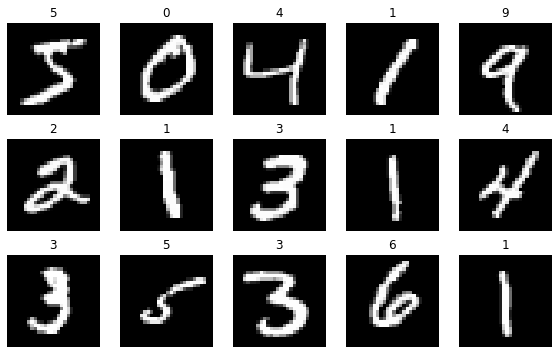

In [28]:
# 데이터 시각화
import matplotlib.pyplot as plt

# canvas 생성
fig, axes = plt.subplots(3, 5)
fig.set_size_inches(8, 5)

for i in range(15):
    ax = axes[i//5, i%5]
    # imshow로 이미지 시각화
    ax.imshow(x_train[i], cmap='gray')
    ax.axis('off')
    ax.set_title(str(y_train[i]))

plt.tight_layout()
plt.show()

* 0~9까지 총 10개 정답 레이블

####데이터 전처리

In [29]:
x_train[0, 10:15, 10:15]

array([[  1, 154, 253,  90,   0],
       [  0, 139, 253, 190,   2],
       [  0,  11, 190, 253,  70],
       [  0,   0,  35, 241, 225],
       [  0,   0,   0,  81, 240]], dtype=uint8)

* 0~255 범위의 값으로 이루어진 이미지를 구성하는 하나의 픽셀 값과 매칭되는 원소

In [30]:
# 픽셀 값의 최소/최대 값 확인
print(f'정규화 전] 최소값: {x_train.min()}, 최대값: {x_train.max()}')

# 데이터 정규화
x_train = x_train / x_train.max()

# 정규화 후 최소/최대 값 확인
print(f'정규화 후] 최소값: {x_train.min()}, 최대값: {x_train.max()}')

정규화 전] 최소값: 0, 최대값: 255
정규화 후] 최소값: 0.0, 최대값: 1.0


In [31]:
# test 셋에도 정규화 동일 적용
x_test = x_test / x_test.max()ㅡ

In [32]:
# 변환 후 x_train 배열의 데이터 확인
x_train[0, 10:15, 10:15]

array([[0.00392157, 0.60392157, 0.99215686, 0.35294118, 0.        ],
       [0.        , 0.54509804, 0.99215686, 0.74509804, 0.00784314],
       [0.        , 0.04313725, 0.74509804, 0.99215686, 0.2745098 ],
       [0.        , 0.        , 0.1372549 , 0.94509804, 0.88235294],
       [0.        , 0.        , 0.        , 0.31764706, 0.94117647]])

####Faltten layer
: 다차원의 데이터를 1차원으로 펼쳐주는 방법 (Dense 레이어에 2차원 이상 데이터를 입력값으로 넣을 수 없기 때문)

In [33]:
print(f'변경전 shape: {x_train.shape}')
print(f'1D으로 shape 변경 후: {x_train.reshape(60000, -1).shape}')

변경전 shape: (60000, 28, 28)
1D으로 shape 변경 후: (60000, 784)


In [34]:
print(f'변경전 shape: {x_train.shape}')

# Flatten 레이어 적용 후 shape 확인
print(f'Flatten 적용 후: {tf.keras.layers.Flatten()(x_train).shape}')

변경전 shape: (60000, 28, 28)
Flatten 적용 후: (60000, 784)


###활성화 함수
: 입력을 비선형 출력으로 변환하는 함수
- Sigmoid
- tanh
- ReLU
- Leaky ReLU

In [35]:
# Dense 레이어에 relu 활성화 함수를 적용한 경우
tf.keras.layers.Dense(128, activation='relu')

In [36]:
# Dense 레이어에 relu 활성화 함수를 적용한 경우
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128), 
    tf.keras.layers.Activation('relu')
])

#배치 정규화를 적용한 후 활성화 함수를 적용하기

####입출력

In [37]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), 
    tf.keras.layers.Dense(256, activation='relu'), 
    tf.keras.layers.Dense(64, activation='relu'), 
    tf.keras.layers.Dense(32, activation='relu'), 
    # 노드=10개 (클래스 개수와 동일)
    tf.keras.layers.Dense(10, activation='softmax'), 
])

In [38]:
# 출력층 노드 = 1인 경우, sigmoid
tf.keras.layers.Dense(1, activation='sigmoid')

# 출력층 노드 = 2개 이상인 경우, softmax
tf.keras.layers.Dense(10, activation='softmax')

####손실함수

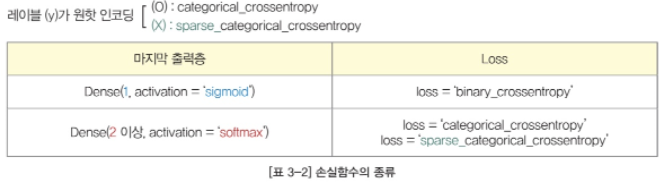

In [39]:
# 이진 분류 (출력 노드 개수 = 1, sigmoid 인 경우)
model.compile(loss='binary_crossentropy')

In [40]:
# y가 원 핫 벡터인 경우
# [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]
model.compile(loss='categorical_crossentropy')

# y가 원 핫 벡터가 아닌경우
# [5]
model.compile(loss='sparse_categorical_crossentropy')

####옵티마이저

: 손실을 낮추기 위해서, 신경망의 가중치와 합습률과 같은 신경망의 속성을 변경하는 데 사용되는 최적화 방법
- SGD
- Adan
- Adagrad
- Nadam
- RMSprop
- Adaelta
- Adamax
- Ftrl

In [41]:
# 클래스 인스턴스로 지정
adam = tf.keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=adam)

# 문자열로 지정
model.compile(optimizer='adam')

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


####평가지표
- accuracy('acc')
- auc
- precision
- recall

In [43]:
# 클래스 인스턴스로 지정
acc = tf.keras.metrics.SparseCategoricalAccuracy()

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=[acc])

####훈련

In [44]:
model.fit(x_train, y_train,
          validation_data=(x_test, y_test), 
          epochs=10, 
          )

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2394 - sparse_categorical_accuracy: 0.9280 - val_loss: 0.1199 - val_sparse_categorical_accuracy: 0.9639
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0971 - sparse_categorical_accuracy: 0.9703 - val_loss: 0.0877 - val_sparse_categorical_accuracy: 0.9722
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0674 - sparse_categorical_accuracy: 0.9786 - val_loss: 0.0836 - val_sparse_categorical_accuracy: 0.9747
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0506 - sparse_categorical_accuracy: 0.9834 - val_loss: 0.0761 - val_sparse_categorical_accuracy: 0.9763
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0412 - sparse_categorical_accuracy: 0.9867 - val_loss: 0.0967 - val_sparse_categorical_accuracy: 0.9743
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0332 - spars

####평가

In [45]:
test_loss, test_acc = model.evaluate(x_test,  y_test)

print('검증셋 정확도:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0871 - sparse_categorical_accuracy: 0.9773
검증셋 정확도: 0.9772999882698059


####예측

In [46]:
predictions = model.predict(x_test)

In [47]:
# 예측 결과 출력
predictions[0]

array([4.8841118e-12, 1.4767229e-06, 3.9247099e-09, 2.3814037e-07,
       1.1792845e-08, 1.0476686e-10, 2.5285980e-14, 9.9995685e-01,
       3.7485077e-09, 4.1430674e-05], dtype=float32)

가장 높은 확률 값을 가진 클래스가 최종 예측된 클래스: argmax()사용

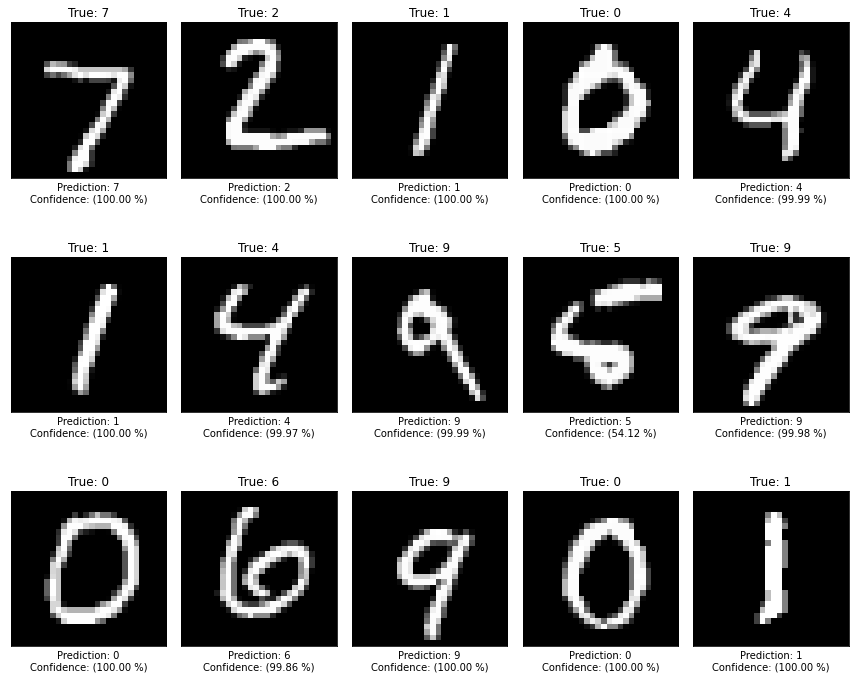

In [48]:
# 데이터 시각화
import matplotlib.pyplot as plt

def get_one_result(idx):
    img, y_true, y_pred, confidence = x_test[idx], y_test[idx], np.argmax(predictions[idx]), 100*np.max(predictions[idx])
    return img, y_true, y_pred, confidence
    
# canvas 생성
fig, axes = plt.subplots(3, 5)
fig.set_size_inches(12, 10)

for i in range(15):
    ax = axes[i//5, i%5]

    img, y_true, y_pred, confidence = get_one_result(i)

    # imshow로 이미지 시각화
    ax.imshow(img, cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f'True: {y_true}')
    ax.set_xlabel(f'Prediction: {y_pred}\nConfidence: ({confidence:.2f} %)')

plt.tight_layout()
plt.show()

###3.4 모델 세부 설정

In [49]:
import tensorflow as tf

# 케라스의 내장 데이터셋에서 mnist 데이터셋을 로드
mnist = tf.keras.datasets.mnist

# load_data()로 데이터셋을 로드 합니다.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 로드된 데이터셋 확인
print('train set: ', x_train.shape, y_train.shape)
print('test  set: ', x_test.shape, y_test.shape)

# 데이터 정규화
x_train = x_train / x_train.max() # max: 255
x_test = x_test / x_test.max() # max: 255

train set:  (60000, 28, 28) (60000,)
test  set:  (10000, 28, 28) (10000,)


####초기값 설정

In [50]:
dense = tf.keras.layers.Dense(256, activation='relu')
dense.get_config()['kernel_initializer']

{'class_name': 'GlorotUniform', 'config': {'seed': None}}

In [51]:
# he normal 초기화
## 방법 1. 문자열 초기화
dense = tf.keras.layers.Dense(256, kernel_initializer='he_normal', activation='relu')
dense.get_config()['kernel_initializer']

{'class_name': 'HeNormal', 'config': {'seed': None}}

In [52]:
## 방법2. 클래스 인스턴스 초기화
he_normal = tf.keras.initializers.HeNormal()
dense = tf.keras.layers.Dense(256, kernel_initializer=he_normal, activation='relu')
dense.get_config()['kernel_initializer']

{'class_name': 'HeNormal', 'config': {'seed': None}}

- glorot_normal, glorot_uniform: 글로럿 초기화
- lecun_normal, lecun_uniform: Yann Lecun 초기화
- he_normal, he_uniform: He 초기화
- random_normal, random_uniform: 정규 분포, 연속균등 분포 초기화

####규제Regularization

In [53]:
dense = tf.keras.layers.Dense(256, activation='relu')
dense.get_config()

{'activation': 'relu',
 'activity_regularizer': None,
 'bias_constraint': None,
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'bias_regularizer': None,
 'dtype': 'float32',
 'kernel_constraint': None,
 'kernel_initializer': {'class_name': 'GlorotUniform',
  'config': {'seed': None}},
 'kernel_regularizer': None,
 'name': 'dense_25',
 'trainable': True,
 'units': 256,
 'use_bias': True}

- 'kernel_regularizer': None

####Drop out
: 모델의 과대적합을 해결하기 위해 확률적으로 몇 개의 신호를 삭제

In [54]:
# Dropout 25% 비율 적용 (25%의 노드가 삭제)
tf.keras.layers.Dropout(0.25)

####배치 정규화 Batch Normalization

: 각 층에서 활성화 함수를 통과하기 전 미니배치의 스케일을 정규화

In [55]:
# Model A: Dense + ReLU
model_a = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])
model_a.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_26 (Dense)            (None, 64)                50240     
                                                                 
 dense_27 (Dense)            (None, 32)                2080      
                                                                 
 dense_28 (Dense)            (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [56]:
# Model B: Dense + BatchNorm + ReLU
model_b = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64),
    # 배치정규화 적용
    tf.keras.layers.BatchNormalization(),
    # 배치정규화 후 활성화 함수 적용
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Dense(32),
    # 배치정규화 적용
    tf.keras.layers.BatchNormalization(),
    # 배치정규화 후 활성화 함수 적용
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Dense(10, activation='softmax'),
])
model_b.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_29 (Dense)            (None, 64)                50240     
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 activation_1 (Activation)   (None, 64)                0         
                                                                 
 dense_30 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_1 (Batc  (None, 32)               128       
 hNormalization)                                      

- 배치 정규화가 추가한 보델이 이전 대비 더 안정적이고 빠르게 수렴함

####활성화 함수

In [57]:
# LeakyReLU 기본 설정
tf.keras.layers.LeakyReLU()

# LeakyReLU, alpha=0.2 로 변경
tf.keras.layers.LeakyReLU(alpha=0.2)

In [58]:
# Model C: Dense + BatchNorm + LeakyReLU(0.2)
model_c = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64),
    # 배치정규화 적용
    tf.keras.layers.BatchNormalization(),
    # LeakyReLU, alpha=0.2 적용
    tf.keras.layers.LeakyReLU(alpha=0.2),

    tf.keras.layers.Dense(32),
    # 배치정규화 적용
    tf.keras.layers.BatchNormalization(),
    # LeakyReLU, alpha=0.2 적용
    tf.keras.layers.LeakyReLU(alpha=0.2),

    tf.keras.layers.Dense(10, activation='softmax'),
])

# 모델 요약
model_c.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_32 (Dense)            (None, 64)                50240     
                                                                 
 batch_normalization_2 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 64)                0         
                                                                 
 dense_33 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_3 (Batc  (None, 32)               128       
 hNormalization)                                     

In [60]:
# 서로 다른 세 모델 성능 비교

model_a.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_b.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_c.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model A: Dense + ReLU
history_a = model_a.fit(x_train, y_train, 
                        validation_data=(x_test, y_test), 
                        epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0284 - accuracy: 0.9905 - val_loss: 0.1053 - val_accuracy: 0.9765
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0223 - accuracy: 0.9926 - val_loss: 0.1136 - val_accuracy: 0.9760
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0233 - accuracy: 0.9922 - val_loss: 0.1435 - val_accuracy: 0.9678
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0210 - accuracy: 0.9927 - val_loss: 0.1239 - val_accuracy: 0.9713
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0178 - accuracy: 0.9943 - val_loss: 0.1711 - val_accuracy: 0.9640
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0188 - accuracy: 0.9935 - val_loss: 0.1387 - val_accuracy: 0.9716
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0139 - accuracy: 0.9953 - val_loss: 0.1320 - val_accuracy:

In [61]:
# Model B: Dense + BatchNorm + ReLU
history_b = model_b.fit(x_train, y_train, 
                        validation_data=(x_test, y_test), 
                        epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0741 - accuracy: 0.9767 - val_loss: 0.0754 - val_accuracy: 0.9764
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0677 - accuracy: 0.9778 - val_loss: 0.0771 - val_accuracy: 0.9774
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0629 - accuracy: 0.9789 - val_loss: 0.0819 - val_accuracy: 0.9769
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0561 - accuracy: 0.9814 - val_loss: 0.0786 - val_accuracy: 0.9759
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0579 - accuracy: 0.9812 - val_loss: 0.0820 - val_accuracy: 0.9745
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0512 - accuracy: 0.9832 - val_loss: 0.0744 - val_accuracy: 0.9776
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0495 - accuracy: 0.9836 - val_loss: 0.0733 - val_accuracy:

In [62]:
# Model C: Dense + BatchNorm + LeakyReLU(0.2)
history_c = model_c.fit(x_train, y_train, 
                        validation_data=(x_test, y_test), 
                        epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3147 - accuracy: 0.9126 - val_loss: 0.1561 - val_accuracy: 0.9543
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1562 - accuracy: 0.9531 - val_loss: 0.1122 - val_accuracy: 0.9654
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1218 - accuracy: 0.9624 - val_loss: 0.1061 - val_accuracy: 0.9660
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1075 - accuracy: 0.9661 - val_loss: 0.0891 - val_accuracy: 0.9734
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0912 - accuracy: 0.9711 - val_loss: 0.0891 - val_accuracy: 0.9724
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0866 - accuracy: 0.9717 - val_loss: 0.0847 - val_accuracy: 0.9735
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0760 - accuracy: 0.9759 - val_loss: 0.0774 - val_accuracy:

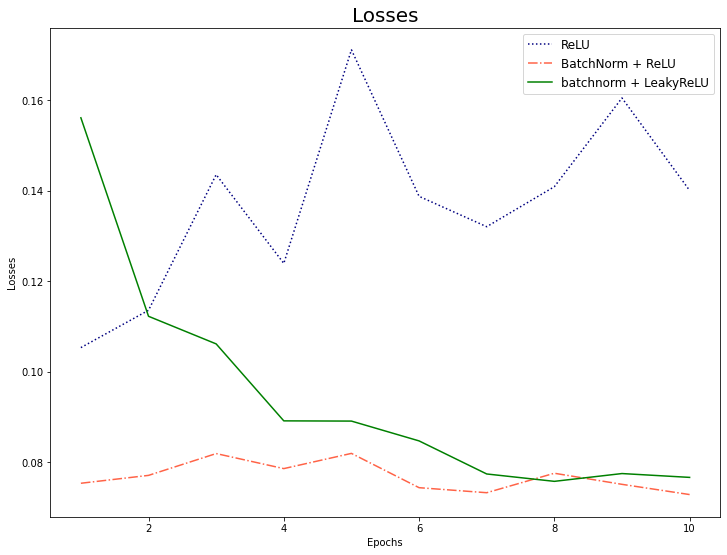

In [63]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 9))
plt.plot(np.arange(1, 11), history_a.history['val_loss'], color='navy', linestyle=':')
plt.plot(np.arange(1, 11), history_b.history['val_loss'], color='tomato', linestyle='-.')
plt.plot(np.arange(1, 11), history_c.history['val_loss'], color='green', linestyle='-')

plt.title('Losses', fontsize=20)
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.legend(['ReLU', 'BatchNorm + ReLU','batchnorm + LeakyReLU'], fontsize=12)
plt.show()

- mnist 데이터셋은 모델별 차이가 크진 않지만, 배치 정규화를 추가한 모델이 활성화 함수를 단독으로 사용한 경우보다 더 나을 것이라고 유추할 수 있음